## Exploratory Data Analysis in Python



## Course Description

How do we get from data to answers? Exploratory data analysis is a process for exploring datasets, answering questions, and visualizing results. This course presents the tools you need to clean and validate data, to visualize distributions and relationships between variables, and to use regression models to predict and explain. You'll explore data related to demographics and health, including the National Survey of Family Growth and the General Social Survey. But the methods you learn apply to all areas of science, engineering, and business. You'll use Pandas, a powerful library for working with data, and other core Python libraries including NumPy and SciPy, StatsModels for regression, and Matplotlib for visualization. With these tools and skills, you will be prepared to work with real data, make discoveries, and present compelling results.

##  Read, clean, and validate
Free
0%

The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis. This is exactly what you'll do in this chapter, while working with a dataset obtained from the National Survey of Family Growth.

    DataFrames and Series    50 xp
    Read the codebook    50 xp
    Exploring the NSFG data    100 xp
    Clean and Validate    50 xp
    Validate a variable    50 xp
    Clean a variable    100 xp
    Compute a variable    100 xp
    Filter and visualize    50 xp
    Make a histogram    100 xp
    Compute birth weight    100 xp
    Filter    100 xp


##  Distributions
0%

In the first chapter, having cleaned and validated your data, you began exploring it by using histograms to visualize distributions. In this chapter, you'll learn how to represent distributions using Probability Mass Functions (PMFs) and Cumulative Distribution Functions (CDFs). You'll learn when to use each of them, and why, while working with a new dataset obtained from the General Social Survey.

    Probability mass functions    50 xp
    Make a PMF    100 xp
    Plot a PMF    100 xp
    Cumulative distribution functions    50 xp
    Make a CDF    100 xp
    Compute IQR    100 xp
    Plot a CDF    100 xp
    Comparing distributions    50 xp
    Distribution of education    50 xp
    Extract education levels    100 xp
    Plot income CDFs    100 xp
    Modeling distributions    50 xp
    Distribution of income    100 xp
    Comparing CDFs    100 xp
    Comparing PDFs    100 xp


##  Relationships
0%

Up until this point, you've only looked at one variable at a time. In this chapter, you'll explore relationships between variables two at a time, using scatter plots and other visualizations to extract insights from a new dataset obtained from the Behavioral Risk Factor Surveillance Survey (BRFSS). You'll also learn how to quantify those relationships using correlation and simple regression.

    Exploring relationships    50 xp
    PMF of age    100 xp
    Scatter plot    100 xp
    Jittering    100 xp
    Visualizing relationships    50 xp
    Height and weight    100 xp
    Distribution of income    100 xp
    Income and height    100 xp
    Correlation    50 xp
    Computing correlations    100 xp
    Interpreting correlations    50 xp
    Simple regression    50 xp
    Income and vegetables    100 xp
    Fit a line    100 xp


##  Multivariate Thinking
0%

Explore multivariate relationships using multiple regression to describe non-linear relationships and logistic regression to explain and predict binary variables.

    Limits of simple regression    50 xp
    Regression and causation    50 xp
    Using StatsModels    100 xp
    Multiple regression    50 xp
    Plot income and education    100 xp
    Non-linear model of education    100 xp
    Visualizing regression results    50 xp
    Making predictions    100 xp
    Visualizing predictions    100 xp
    Logistic regression    50 xp
    Predicting a binary variable    100 xp
    Next steps    50 xp 
    

## DataFrames and Series



Welcome to Exploratory Data Analysis in Python.  The instructor's name is Allen Downey.  [The goal of exploratory data analysis is to answer the questions and guide decision making].  As a first example, we'll start with a simple __question: what is the average birth weight of babies in teh United States?__  To answera question like this, we have to find an appropriate dataset or run an experiment to collect it.  Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.  For this questionwe'll use data from the National Survery of Family Growth, which is available from the National Center for Health Statistics.  The 2012-2015 dataset includes information about a representative sample of women in the USA and their children.  

The Python module we'll use to read and analyze data in Pandas.  Pandas can read data in most common formats, including CSV, Excel, and the format NSFG data is in, HDF5 (DO you recall how we test importing data from different sources with Pandas? get remember it ).  The result from "pd.read_hdf('nsfg.hdf5', 'nsfg')" is a DataFrame, which is the primary data structure Pandas uses to store data.  Using "df.head()" giving us pregnancy for each of women who participated in the survey, and one column for each variable.  The DF has an attribute ".shape", which is the number of rows and columns.  And the ".columns" attributes, as an [index] (DF are formed by 3 object, index, columns, data, do you recall when we learned this topic, go back to read it again).  Thats another Pandas data structure, similar to a list; in this case its a list of variables names, which are strings.  For the reliable information about the data, you have to read teh documentation.  Say what does this columns "birthwgt_lb1" means?  The documentation tell us that it is the weight in pounds of teh first baby from this pregnancy, for cases of live birth.  

In many ways, a DF is like a Python's dictionary, where the variable names are the keys and the columns are the values.  You can select a column from a DF using the bracket operator, with a string as the key.  The result is a Series, which is another Pandas data structure.  In this case the Series contains the birth weights, in pounds, of the live births (or in the case of multiple births, the first baby).  The "df.head()" shows the first 5 rows of the Seris and the name of the Series, and the datatype; float64 means that these values are 64-bit floating point numbers.  Notice that one of the values is NaN, which stands for "Not a Number".  NaN is a special value that can indicate invalid or missing data.  In that example, the pregnancy did not end in live birth, so birth weight is inapplicable.  



In [12]:
import pandas as pd


df = pd.read_hdf('nsfg.hdf5', 'nsfg')
print(type(df), '\n')


print(df.head(), '\n')

print(df.shape, '\n')
print(df.columns, '\n')


print("Case Id: \n", df['caseid'])

<class 'pandas.core.frame.DataFrame'> 

   caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0   60418        1           5.0           4.0        40       1.0    2000   
1   60418        1           4.0          12.0        36       1.0    2291   
2   60418        1           5.0           4.0        36       1.0    3241   
3   60419        6           NaN           NaN        33       NaN    3650   
4   60420        1           8.0          13.0        41       1.0    2191   

   agepreg  hpagelb  wgt2013_2015  
0   2075.0     22.0   3554.964843  
1   2358.0     25.0   3554.964843  
2   3308.0     52.0   3554.964843  
3      NaN      NaN   2484.535358  
4   2266.0     24.0   2903.782914   

(9358, 10) 

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object') 

Case Id: 
 0       60418
1       60418
2       60418
3       60419
4       60420
        ...  
9

## Read the codebook

When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

birthwgt_oz1 codebook

How many respondents refused to answer this question?

Possible Answers

    1
    1
    35
    2
    48-49
    3
    2967
    4


<img src='https://assets.datacamp.com/production/repositories/4025/datasets/0d2a0c18b63f3ddf056858c145a6bdc022d8656c/Screenshot%202019-03-31%2019.16.14.png'>

## Exploring the NSFG data

To get the number of rows and columns in a DataFrame, you can read its shape attribute.

To get the column names, you can read the columns attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called nsfg.
Instructions 1/4
25 XP

    Question 1
    Calculate the number of rows and columns in the DataFrame nsfg.
    
    
    Question 2
    Display the names of the columns in nsfg.
    
    
    Question 3
    Select the column 'birthwgt_oz1' and assign it to a new variable called ounces.
    
    
    Question 4
    Display the first 5 elements of ounces.


In [ ]:
# Display the number of rows and columns
nsfg.shape

# Display the names of the columns
nsfg.columns

# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']

# Print the first 5 elements of ounces
print(____)

## Clean and Validate



In the previous lesson, we read data from the National Survery of Family Growth and selected a column from a DataFrame.  [In this lesson, we'll check for errors and prepare the data for analysis].  We'll use the same DF we used in the previous lesson - nsfg, which contains one row for each pregnancy  in the survey.  We'll select the variable "birthwgt_lb1", which contains the pound part of birth weight, and assign it to pounds.  And "birthwgt_oz1" contains the ounce part of birth weight, so we'll assign that to ounces.  

[Before we do anything with this data, we have to validate it].  One part of validation is confirming that we are interpreting the data correctly.  We can use the "df.value_counts()" method to see what values appear in pounds and how many times each value appears.  By default, the results are sorted with the most frequent value first, so we use ".sort_index()" method to sort them by value instead (?? You mean use "df.sort_values()" method), with the lightest babies first and heaviest babies last.  As we'd expect, the most frequent values are 6-8 pounds, but there are some very light babies, a few very heavy babies, and two values, 98 and 99, that indicate missing data.  We can validate the results by comparing them to the codebook, which lists the values and their frequencies.  The results here agree with the codebook (__He means the data range is okay with documentation, go back the chack data processing with Pandas course or data cleaning course I guess and re-study it__), so we have some confidence that we are reading and interpreting the data correctly.  

Another way to validate the data in with "df.describe()" method, which computes summary statistics like mean, standard deviation, min, and max (__But be careful with data type and range, as value based categories will appear min, max, mean statistic summary__).  Here we have the results for pounds.  The "count" is the number of values, The "minimum" and "maximum" values are 0 and 99 (Here the 98 and 99 are actually not real values, but specific category labels to represent value missing or bad things), and the 50th percentile, which is the [median] (Why based on statistic knowledge, sometime we don't use avg but use median instead?   {__Why median is used instead of average?__
The mean is the most frequently used measure of central tendency because it uses all values in the data set to give you an average. For data from skewed distributions, the median is better than the mean because it isn't influenced by extremely large values.}   [][Google this topic], and I think one of the course talked about this topic), is 7.  

The mean is about 8.05, but that doesn't mean much because it includes the special values 98 and 99.  Before we can really compute the mean, we have to replace those values with NaN to represent missing data.  The "df.replace()" method does what we want; it takes a list of values we want to replace and the values we want to replace them with.  The "np.nan" means we are getting the special value NaN form the NumPy library.  __The result from the "df.replace()" method is a new Series, whcih we assign back to replace its origin__.  Remember that the mean of the original Series was about 8.05 pounds.  The mean of the new Series is about 6.7 pounds.  It makes a big difference when you remove a few 98 and 99 pounds values.  

[Instead of making a new Series, you can call "df.replace(inplace=True)" with "replace=True", which modifies the existing Series in place, that is without making a copy].  Here's what that look like for ounces.  Since we didn't make a new Series, we don't have to assign it back to its origin.  


Now say we want to combine pounds and ounces into a single Series that contains total birth weight.  Arithmetic operators work with Series objects; so to convert from ounces to pounds, we can divide by 16 (there are 16 ounces in a pound).  Then we can add the two Series objects to get the total (Compare the calculation difference between SQL and Pandas, and recall in which course we learned such topic, re-study it and [][Google this topic]).  And here are the results.  The refreshed more accurate values are mean 7.1 pounds, which is little more than what we got before we added in the ounces part.  [Now we are close to answering our original question, the average birth weight for babiesin the USA] (__See, we need to check its distribution, cause the median will be more representive than mean in the skewed distribution__[][Google charm]).  But as we'll see in the next lesson, we're not there yet.  




## The values are based on how hard you are thinking and how hard you are pursuing

In [32]:
print(df.head())
print('\n')


print(df['prglngth'].value_counts()[:5])
print('\n')


print(df['prglngth'].value_counts().sort_values()[:5])
print('\n')


print(df['prglngth'].value_counts().sort_index()[:5])    # I know the instructor is wrong about this function

print(df['birthwgt_lb1'].describe())


import numpy as np
df['birthwgt_lb1'] = df['birthwgt_lb1'].replace([98, 99], np.nan)
df['birthwgt_lb1'].replace('NaN', np.nan, inplace=True)   # =========================================================

print(df['birthwgt_lb1'].describe())
print('\n')



df['Total_weight_pounds'] = df['birthwgt_lb1'] + df['birthwgt_oz1']/16   # ==========================================

print(df['Total_weight_pounds'].describe())

   caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0   60418        1           5.0           4.0        40       1.0    2000   
1   60418        1           4.0          12.0        36       1.0    2291   
2   60418        1           5.0           4.0        36       1.0    3241   
3   60419        6           NaN           NaN        33       NaN    3650   
4   60420        1           8.0          13.0        41       1.0    2191   

   agepreg  hpagelb  wgt2013_2015  Total_weight_pounds  
0   2075.0     22.0   3554.964843               5.2500  
1   2358.0     25.0   3554.964843               4.7500  
2   3308.0     52.0   3554.964843               5.2500  
3      NaN      NaN   2484.535358                  NaN  
4   2266.0     24.0   2903.782914               8.8125  


39    2384
40    1311
38     755
37     432
41     422
Name: prglngth, dtype: int64


48    1
45    3
46    3
0     7
23    7
Name: prglngth, dtype: int64


0      7
1     11
2     50
3  

## Validate a variable

In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:
value 	label
1 	Live birth
2 	Induced abortion
3 	Stillbirth
4 	Miscarriage
5 	Ectopic pregnancy
6 	Current pregnancy

The nsfg DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question: How many pregnancies in this dataset ended with a live birth?
Instructions
50 XP
Possible Answers

    6489
    9538
    1469
    6
    

In [ ]:
In [1]:
nsfg['outcome'].count_values()
Traceback (most recent call last):
  File "<stdin>", line 72, in exceptionCatcher
    raise exception
  File "<stdin>", line 3361, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "<stdin>", line 3458, in run_code
    self.showtraceback(running_compiled_code=True)
  File "<stdin>", line 2066, in showtraceback
    self._showtraceback(etype, value, stb)
  File "<stdin>", line 72, in exceptionCatcher
    raise exception
  File "<stdin>", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<stdin>", line 1, in <module>
    nsfg['outcome'].count_values()
  File "<stdin>", line 5487, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'Series' object has no attribute 'count_values'
In [2]:
nsfg['outcome'].value_counts()   # ==================================================================================
Out[2]:                          # Its value_counts() NOT count_values()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

## Clean a variable

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace() method:

[
ounces.replace([98, 99], np.nan, inplace=True)
]

Instructions
100 XP

    In the 'nbrnaliv' column, replace the value 8, in place, with the special value NaN.
    Confirm that the value 8 no longer appears in this column by printing the values and their frequencies.


In [35]:
# Replace the value 8 with NaN
df['nbrnaliv'].replace(8, np.nan, inplace=True)

# Print the values and their frequencies
print(df['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.
Instructions 1/3
35 XP

    Question 1
    Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.
    
    
    Question 2
    Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.
    
    
    Question 3
    Use .describe() to compute the mean duration and other summary statistics.
    

In [37]:
print(df[['agecon', 'agepreg']].head())


df['agecon'] = df['agecon']/100

print(df['agecon'].head())



# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(____)

   agecon  agepreg
0    2000   2075.0
1    2291   2358.0
2    3241   3308.0
3    3650      NaN
4    2191   2266.0
0    20.00
1    22.91
2    32.41
3    36.50
4    21.91
Name: agecon, dtype: float64


## Filter and visualize




Let's get back to the motivating question for this chapter: what is the average birth weight for the babies in the USA.  In the previous lesson, we used data from teh NSFG to compute birth weight in pounds (we convered the ounces part and added it back to modified new pound column) and we stored the result in a Series.  [Lets see what the distribution of those values looks like].  We'll use the pyplot submodule from the Matplotlib visualization library which we import as plt.  The Pyplot provides "plt.hist()" function, which takes a Series and plots a histogram; that is, it shows the values and how often they appear.  However, __[pyplot doesn't work with NaNs]__ (How does Tableau deal with NaNs, does that NaNs will effect our calculation?  [Googe this]), so we have to use "df.dropna()", which makes a new Series that contains ony the valid values.  The bins tells "plt.hist()" function to divide the range of weights into 30 intervals, called "bins", and count how many values fall in each bin.  

The "plt.hist()" function takes other arguments that specify the type and appearance of the histogram; you will have a chance to explore these options in the next exercise.  To label the axes we'll use the "plt.xlabel()" and "plt.ylabel()", and finally to display teh plot, we use "plt.show()".  

Checking below plots, the x-axis is birth weight in pounds divided into 30 bins.  While the y-axis is the number of births in each bin.  [__The distribution looks a little like a bell curve, but the tail is longer on the left than on the right; that is, there are more light weight babies than heavy babies__].  That makes sense because the distribution includes some babies that were born preterm.  The most common duration of pregnancy is 39 weeks, which is "full term", "preterm" is usually defined to be less than 37 weeks.  [Google it yourself].  To check which babies are preterm, we can use the "prglngth" column, which records pregnancy length in weeks.  When you compare a Series to a value, the result is a Boolean Series.  If you compute the mean, you get the fraction of Trues; in this case, its close to 0.4, that is about 40% of the births in this dataset are preterm (What happened?  Why there is so much portion of poor babies born earlier).  

We can use a Boolean Series as a filter; that is, we can select only rows that satisfy a condition or meet some [][criterion].  For example, we can use preterm and the bracket operator to select values from birth_weight, so preterm_weight contains birth weights for preterm babies.  To select the full-term babies, we can use the tilde (~) operator, which is logical NOT or inverse; it makes the True False diverse.  Not surprisingly, full-term babies are heaver, on average, than preterm babies.  (__but the weight distribution of two baby groups are different, the full-terms are XXX adn teh preterms are YYY, does these tells us any valuable information__)  If you have 2 Boolean Series, you can use logical operators to combine them; ampersand (&) is the logical AND, and the vertical bar (|) or pipe is logical OR.  

[There is one more thing we have to do before we can answer our question; resampling].  The NSFG is not exactly representative of the USA population; be design, some groups are more likely to appear in the sample than others; they are [__"oversampled"__].  __Oversampling helps to ensure that you have enough people in every subgroup to get teh reliable statistics, but it makes tha analytics a little more complicated__.  However, [__we can correct for oversampling by resampling__].  (How can we identify if there is oversampling happened? and does oversampling is always a bad thing, any cirteria? ab testing, retention calication? [][Google this topic, *****])  We won't get into the details here, but the institor have provided a function ["resample_rows_weighted()"] that we can use for the exercise.  If you are interested in learning more about resampling, check out DataCamp's statistics courses.  


Now we have everything we need to answer the motivating question.  



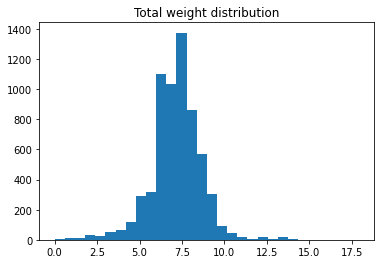

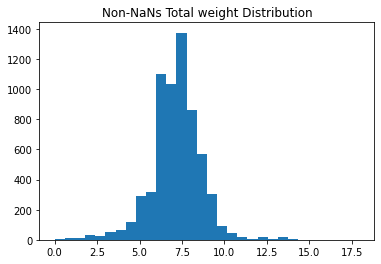

   caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
0   60418        1           5.0           4.0        40       1.0   20.00   
1   60418        1           4.0          12.0        36       1.0   22.91   
2   60418        1           5.0           4.0        36       1.0   32.41   
3   60419        6           NaN           NaN        33       NaN   36.50   
4   60420        1           8.0          13.0        41       1.0   21.91   

   agepreg  hpagelb  wgt2013_2015  Total_weight_pounds  
0   2075.0     22.0   3554.964843               5.2500  
1   2358.0     25.0   3554.964843               4.7500  
2   3308.0     52.0   3554.964843               5.2500  
3      NaN      NaN   2484.535358                  NaN  
4   2266.0     24.0   2903.782914               8.8125   

3742
0.39987176747168196
   caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  \
1   60418        1           4.0          12.0        36       1.0   22.91   
2   60

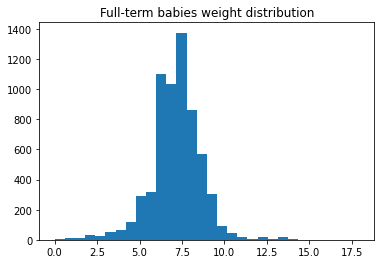

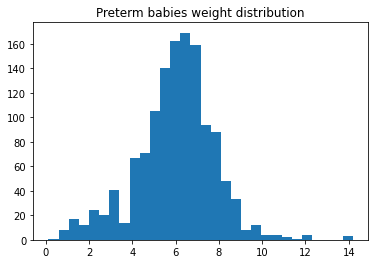

In [58]:
import matplotlib.pyplot as plt

#print(dir(plt))

plt.hist(df['Total_weight_pounds'], bins=30)
plt.title('Total weight distribution')
plt.show()


plt.hist(df['Total_weight_pounds'].dropna(), bins=30)
plt.title('Non-NaNs Total weight Distribution')
plt.show()


print(df.head(), '\n')

preterm = df[df['prglngth']<=37]
print(sum(df['prglngth']<37))
print(np.mean(df['prglngth']<37))

print(preterm.head())


plt.hist(df.loc[~df['prglngth']<=37, 'Total_weight_pounds'], bins=30)   # ===========================================
plt.title('Full-term babies weight distribution')
plt.show()


plt.hist(df.loc[df['prglngth']<=37, 'Total_weight_pounds'], bins=30)   # ===========================================
plt.title('Preterm babies weight distribution')
plt.show()

## Your thinking made who you are, do not lazy

## The values are based on how hard you are thinking and how hard you are pursuing

## Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.
Instructions 1/2
50 XP
Instructions 1/2
50 XP

    Question 1
    Plot a histogram of agecon with 20 bins.


    Question 2
    Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.
    

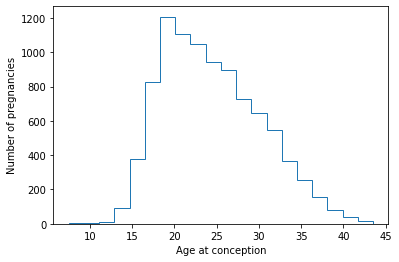

In [59]:
# Plot the histogram
plt.hist(df['agecon'], bins=20, histtype='step')   # ================================================================

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## Compute birth weight

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

Instructions
100 XP

    Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
    Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.
    Compute the mean weight of full-term babies.


In [ ]:
# Create a Boolean Series for full-term babies
full_term = df['Total_weight_pounds']>27

# Select the weights of full-term babies
full_term_weight = df['Total_weight_pounds'][full_term]   # XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
                                                          # Think what is correct, & recall data manipulation course

# Compute the mean weight of full-term babies
print(____)

In [ ]:
In [1]:
??resample_rows_weighted
Signature: resample_rows_weighted(df, column='finalwgt', seed=17)
Source:   
def resample_rows_weighted(df, column='finalwgt', seed=17):
    """Resamples a DataFrame using probabilities proportional to given column.

    df: DataFrame
    column: string column name to use as weights

    returns: DataFrame
    """
    np.random.seed(seed)
    weights = df[column] / sum(df[column])
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample
File:      /tmp/tmph40924vw/<ipython-input-1-8383685dfbe7>
Type:      function


## Filter

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.
Instructions
100 XP

    Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
    Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
    For comparison, select multiple, full-term babies and compute their mean birth weight.


In [60]:
df['nbrnaliv'].value_counts()


# We need to go read document, and understand what does value `3` means in our dataset, 
# and then devide to clean it or replace it

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [ ]:
# Filter full-term babies
full_term = df['prglngth'] >= 37

# Filter single births
single = df['nbrnaliv']=1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[____ & ____]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


## Probability mass functions




In the previous chapter, we used histograms to visualize distributions.  In this chpater, we'll represent 2 more ways to represent distributions and we'll learn when to use each of them.  And we'll work with a new datase.  The General Social Survey, or GSS, has run annually since 1972, it surverys a __representative sample,__[Define representative][Google this topic][https://www.google.com/search?client=firefox-b-e&q=probability+maff+function+and+distribution+difference]) of the adult population in the USA, and asks questions about demographics and beliefs about social and political issues.  It is widely used by politicians, policy makers, and researchers, including the instructor.  The GSS contains hundreds of variables; we've selected just a few.  And the instructor have already clearned and validated them, so we just have to read the file.  "gss = pd.read_hdf('gss.hdf5', 'gss')".  

To get started with this dataset, lets look at the distribution of educ, whcih records the number of years of education for each respondent.  First we'll select a column from the DF.  And we've already seen one way to visualize distribution, a histogram.  Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peakis near 12 years of education.  [__But a histogram is not the best way to visualize this distribution__].  An [alternative is a probability mass function] [Google this topic, and learn statistics, what is a Probability Mass Function, and how it was used in statistics? ] [https://en.wikipedia.org/wiki/Probability_mass_function] [Give me a break here, focus on statistics afterwards], or PMF, that contains the unique values in the dataset and how often each one appears.  

The instructor had provided a class called Pmf that computes a probability mass function.  This function is based on a Pandas Series (__Class inheritance, Recall what we learned in Python OOP I suppose, we learned how to write a self modified Panda DataFrame class, with a new timestamp sttribute logging DF creating time__[Re-study it] [And image what would be the class institor wrote, as I saw the bins equal to 1, and round the years column, and that would be my approach, if I'm doing it]) and it provides some methods that aren't in Pandas.  The first argument can be any kind of sequence; in this case, its a Series object.  The second argument indicates that we don't want to normalize this PMF.  I'll explain what that means soon.  The result is a Series that contains the values on the left and the counts on the right.  In this dataset, there are 566 [respondents] who report that they have zero years of formal eduction.  You can use the bracket operator to look up a value in a Pmf and get a count.  The example shows that there are 47689 respondents with 12 years of education, which is the most frequent value.  [__Usually when we make a Pmf, we want to know the fraction of respondents with each value, rather than the counts__].  We can do that by  setting normalize=True, then we get a normalized Pmf, that is a Pmf where the frequencies add up to 1.  Now if we use the bracket operator, the result is a fraction.  In this example, the fraction of people with 12 years of education is 0.306.  The Pmf class provides a ".bar()" method that plots a PMF as a bar art.  In the slide figure, we can see more clearly that the most common value is 12 years, but there are also peaks at 14 and 16, which correspond to 2 and 4 years of college.  

For this data, teh PMF is probably a better hoice than the histogram [WHY saying so? ].  [][__The PMF shows all unique values, so we can see exactly where the peaks are__] (So its like we did on Tableau, but not filtering column as DAY,  Think here, should we do this on our Tableau charts? Need to figure when to use each, a histogram or a PMF).  [][And because the histogram puts values into bins, it obscures some details].  In our example we can't see the peaks at 14and 16 years.  While [__PMF have limitations too__] as we'll see in the next lesson.  


[
pmf_educ = Pmf(educ, normalize=False)
pmd_educ.head()
]

0.0     566
1.0     118
2.0     292
3.0     686
4.0     746

pmf_educ.bar(label='educ')
plt.xlabel('Years of edu')
plt.ylabel('PMF')

plt.legend()
plt.show()



   year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339
3  1972  61.0  1911.0    2     1  14.0  37226.0     1.0    NaN   0.8893
4  1972  59.0  1913.0    1     1  12.0  30458.0     2.0    NaN   0.8893 



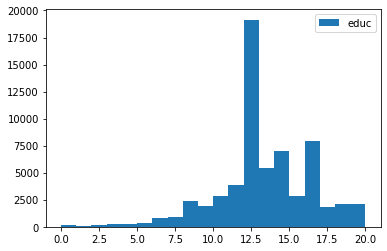

/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


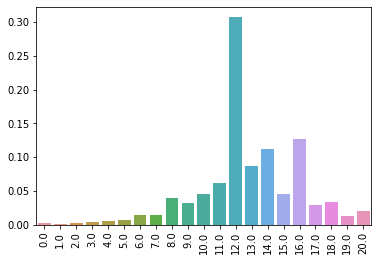

[]

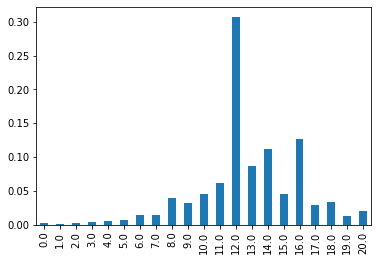

In [1]:
import pandas as pd


gss = pd.read_hdf('gss.hdf5', 'gss')
print(gss.head(), '\n')


import matplotlib.pyplot as plt
                                                        # -----------------------------------------------------------
plt.hist(gss['educ'].dropna(), bins=20, label='educ')   # Does that means increasing bins you can achieve same result
plt.legend()                                            # but you need to guess relative bin size, so lets just PMF
plt.show()





# Below is two approach we can take to draw a PMF with Seaborn or Matplotlib ++++++++++++++++++++++++++++++++++++++++
# https://stackoverflow.com/questions/25273415/how-to-plot-a-pmf-of-a-sample

import seaborn as sns

probabilities = gss['educ'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)
plt.xticks(rotation=90)

plt.show()




pmf = gss['educ'].value_counts().sort_index() / len(gss['educ'])
pmf.plot(kind='bar')

plt.plot()

## Make a PMF

The GSS dataset has been pre-loaded for you into a DataFrame called gss. You can explore it in the IPython Shell to get familiar with it.

In this exercise, you'll focus on one variable in this dataset, 'year', which represents the year each respondent was interviewed.

The Pmf class you saw in the video has already been created for you. You can access it outside of DataCamp via the empiricaldist library.
Instructions 1/2
50 XP

    Question 1
    Make a PMF for year with normalize=False and display the result.
    
    
    Question 2
    How many respondents were interviewed in 2016?
Possible Answers

    2867
    1613
    2538
    0.045897
Answer : 2867


In [ ]:
# Compute the PMF for year
pmf_year = Pmf(df['year'], normalize=False)

# Print the result
print(pmf_year)

## Plot a PMF

Now let's plot a PMF for the age of the respondents in the GSS dataset. The variable 'age' contains respondents' age in years.
Instructions 1/3
35 XP

    Question 1
    Select the 'age' column from the gss DataFrame and store the result in age.
    
    
    Question 2
    Make a normalized PMF of age. Store the result in pmf_age.
    
    
    Question 3
    Plot pmf_age as a bar chart.


In [ ]:
# Select the age column
age = ____


# Make a PMF of age
pmf_age = Pmf(age, normalize = True)


# Make a PMF of age
pmf_age = Pmf(age)

# Plot the PMF
pmf_age.bar()

# Label the axes
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()


Just re-read what the institor said before

## Cumulative distribution functions




In the previous lesson, we saw the probability mass function, or [__PMF, which represent the possible values in a distribution and their probabilities__].  In this lesson, we'll see another way to represent a distribution, the [][cumulative distribution function, or CDF] (I can recall the Coursera Harvard Statistic and Biological Science course taught about this, but I didn't kept up).  [__CDFs are useful for some computations; they are also a great way to visualize and compare distributions__] [Whats its difference between Histogram and PMF].  

You might remember that a [PMF] tells you - __if you draw a random[][Define Random - equal chance][does education years of given population is random???] value from a distribution - whats the chance of getting x, for any given value of x__.  The [][__CDF is similar; if you draw a random value from distribution, it tells you the chance of getting a value less than or equal to x__] (so it should be a 's' curve).  As a small example, suppose the distribution only has 5 elements, 1, 2, 2, 3, 5.  The [PMF] says that the probability of value `1` is 1/5; the probability of value `2` is 2/5, and the probabilities for value `3` and `5` are 1/5.  While the [CDF] is the cumulative sum of the probabilities from the PMF.  For example, the CDF of value `2` is 3/5, because 3 out of 5 values in the distribution are less or equal to value `2`.  The CDF of 5 is because all of the value in our distribution are less than or equal to 5.  

In the code for this course, the institutor has provided a Cdf class which is similar to the Pmf class we've seen.  As a function, Cdf takes any kind of sequence and returns a new Cdf object (__I want to write one myself__).  In this example, the sequence is the ages of respondents in the General Social Survey.  The Cdf provides plot() method, which plots the CDF as a line.  Here is what is liooks like ([__Its not a `s` curve on the slide, Think what I'm wrong???  SO enless its a normal distribution, otherwise it would not be a `s` curve??? I guess__]).  The x-axis is the ages, from 18 to 89.  The y-axis is the cummulative probabilities, from 0 to 1.  The Cdf objectcan be used as a function, so if you give it a age, it returns the corresponding probability.  In belwow example, the age is the quantity, q, which is 51.  The corresponding probability is p which is 0.66.  That means that about 66% of the respondents are 51 years old or younger.  The arrow in the figure on the slide shows how you could read this value from the CDF, at least approximately.  [The CDF is an invertible function, which means that if you have a probability, p, you can look up the corresponding quantity, q].  In this example, we look up the probability 0.25, which returns 30.  That means that 25% of the respondents are age 30 or less.  Another fancy way to say the same thing is: [][age 30 is the 25th percentile of this distribution].  And we also look up the probability 0.75, which returns 57, so 75% of the respondents are 57 or younger.  [__BTW, the distance from the 25th the the 75th percentile is called the interquartile range, or IQR__].  [It measures the spread of the distribution], so it is similar to standard deviation or variance.  Because it is based on percentiles, it doesn't get thrown off by extreme values or outliers, the way variance does (What??? SOrry but I didn't get it).  So IQR can be more "robust" than varince, which means it works well even if there are errors in the data or extreme values (Oh, IQR is based on the number of values, enless the extreme values are many).  

In the next lesson, we'll use CDFs to compare distributions between groups.  But [][first you can (should) practice making nd plotting CDFs, and reading them forward and backwards].  



cdf = Cdf(df['age'])
cdf.plot()
plt.xlabel('Age')
plt.ylabel('CDF')
lt.show()


q = 51
p = cdf(q)
print(p)

>0.66

## Make a CDF

In this exercise, you'll make a CDF and use it to determine the fraction of respondents in the GSS dataset who are OLDER than 30.

The GSS dataset has been preloaded for you into a DataFrame called gss.

As with the Pmf class from the previous lesson, the Cdf class you just saw in the video has been created for you, and you can access it outside of DataCamp via the empiricaldist library.
Instructions 1/4
50 XP

    Question 1
    Select the 'age' column. Store the result in age.
    
    
    Question 2
    Compute the CDF of age. Store the result in cdf_age.
    
    
    Question 3
    Calculate the CDF of 30.
    
    
    Question 4
    What fraction of the respondents in the GSS dataset are OLDER than 30?

Possible Answers
    Approximately 75%
    Approximately 65%
    Approximately 45%
    Approximately 25%
    Answer : Approximately 75%


In [ ]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf(age)

# Calculate the CDF of 30
print(cdf_age(30))

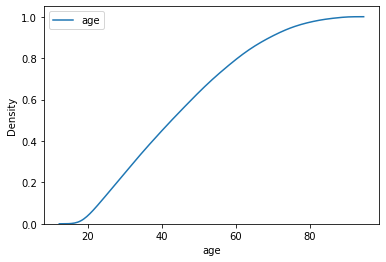

23.0    0.022671
30.0    0.021724
33.0    0.021724
32.0    0.021644
25.0    0.021435
          ...   
84.0    0.002489
85.0    0.002360
86.0    0.001927
87.0    0.001702
88.0    0.001413
Name: age, Length: 72, dtype: float64


/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


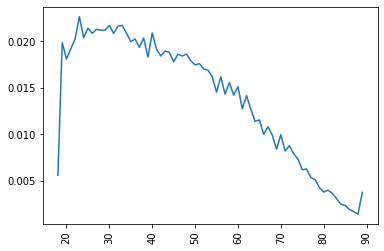

23.0    0.022671
30.0    0.044396
33.0    0.066120
32.0    0.087764
25.0    0.109199
          ...   
84.0    0.992598
85.0    0.994958
86.0    0.996885
87.0    0.998587
88.0    1.000000
Name: age, Length: 72, dtype: float64


/home/jhu/.virtual_environments/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


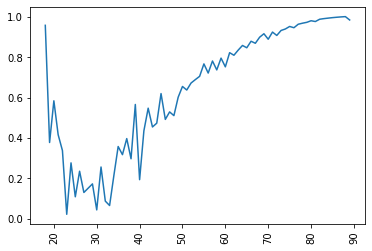

[18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 nan]
18.0     350
19.0    1238
20.0    1128
21.0    1197
22.0    1261
        ... 
85.0     147
86.0     120
87.0     106
88.0      88
89.0     235
Name: age, Length: 72, dtype: int64


In [27]:
# The most important skillset is to Google out the question you want to know, no need to memorize everything 
# -------------------------------------------------------------------------------------------------------------------
# https://stackoverflow.com/questions/9378420/how-to-plot-cdf-in-matplotlib-in-python


sns.kdeplot(data = gss['age'].dropna().sort_values(), cumulative = True, label = "age")
plt.legend()

plt.show()




import seaborn as sns
import numpy as np

probabilities = gss['age'].dropna().sort_values().value_counts(normalize=True)    
print(probabilities)
sns.lineplot(probabilities.index, probabilities.values)
plt.xticks(rotation=90)

plt.show()



probabilities = np.cumsum(gss['age'].dropna().sort_values().value_counts(normalize=True)) 
print(probabilities)
sns.lineplot(probabilities.index, probabilities.values)
plt.xticks(rotation=90)

plt.show()




print(gss['age'].sort_values().unique())

print(gss['age'].value_counts().sort_index())

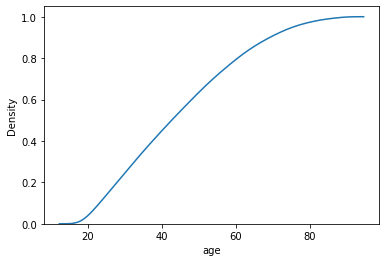

24483    18.0
40329    18.0
4921     18.0
50501    18.0
57596    18.0
         ... 
60684     NaN
61233     NaN
61421     NaN
61738     NaN
62131     NaN
Name: age, Length: 62466, dtype: float64


0.9999839912912625

In [3]:
import pandas as pd
from datetime import datetime


# Define LoggedDF inherited from pd.DataFrame and add the constructor
class Cdf(pd.Series):
    # Should I import every needed packages here? And deleate involved variables and others afterwords?
    # I forgot the Python OOP and function courses, need to re-study it and be familiar with this
    
    def __init__(self,series):
        pd.Series.__init__(self,series)
        self.created_at = datetime.today()
        self.series = series.sort_values()
    
        
    def plot(self,*args):
        sns.kdeplot(data=self.series, cumulative=True)
        plt.show()
        
        
    def __call__(self, value):
        print(self.series)
        for i in range(len(self.series)-1):
            if self.series[i] <= value:
                pass
                #print((i+1)/len(self.series))
                
            else:
                outcome = (i+1)/len(self.series)
        return outcome
    




cdf_age = Cdf(gss['age'])
cdf_age.plot()
cdf_age(30)


# What happened, why this broken code works? I didn't even crossed my fingers and give it a thought

#####################################################################################################################
# Must write this and many others for my own use, and then think about the algorithms, and made toys for myself
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Compute IQR

Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

In this exercise, you'll compute the interquartile range of income in the GSS dataset. Income is stored in the 'realinc' column, and the CDF of income has already been computed and stored in cdf_income.
Instructions 1/4
25 XP

    Question 1
    Calculate the 75th percentile of income and store it in percentile_75th.
    
    
    Question 2
    Calculate the 25th percentile of income and store it in percentile_25th
    
    
    Question 3
    Calculate the interquartile range of income. Store the result in iqr.
    
    
    Question 4
    What is the interquartile range (IQR) of income in the GSS datset?
Possible Answers

Approximately 29676
Approximately 26015
Approximately 34702
Approximately 30655

Answer : Approximately 29676
  

In [ ]:

# Calculate the 75th percentile
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

## Plot a CDF

The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the GSS dataset, the variable 'realinc' represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.
Instructions
100 XP

    Select 'realinc' from the gss dataset.
    Make a Cdf object called cdf_income.
    Create a plot of cdf_income using .plot().


In [ ]:
# Select realinc
income = ____

# Make the CDF
cdf_income = ____

# Plot it
____

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()



# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## Comparing distributions



So far, we've seen two ways to represent distributions, PMFs and CDFs.  In this lesson, we'll [][use PMFs and CDFs to compare distributions, and we'll see the pros and cons of each].  One way to compare distributions is to plot multiple PMFs on the same axes (why says so).  For example, [__suppose we want to compare the distribution of age for male and female respondents__] (now restudy the data visualization courses of Matplotlib and Seaborn).  Here the instructor first create a boolean Series thats True for male respondents.  And then extract the age column.  Then select ages for the male and female respondents.  And plot a Pdf for each (you see, we have to be capable to create the classes and functions of what we needed, then the study can be much enjorable).  And always remember to lael the axes.  

It looks like there are more men in their twenties (but can you see it clearly?) maybe.  And there are more women in their 70s and 80s.  In between, the plot is pretty noisy; most of these differenes are just random variations (the Z lines in between covers each other).  We can do the same thing with CDFs, the code should be the same as Pmf replaced to Cdf.  And the result show as below.  [__In general, CDFs are smoother than PMFs__] (Why, think, cumulative adds up maybe), Because they smooth out randomness, we can often get a better view of real differences between distributions.  In this case, [][the lines overlap over the whole range; that is the distribution are nearly identical] (think how to read the plot and which plot to use).  [][__But we can see the blue line to the left of oriange line across the distribution, which shows that men are younger at every percentile__].  Or, another way to think of it; for every age, the fraction of men below that age is more than the fraction of women below that age.  But not by very much.  


male = gss['sex'] == 1

male_age = gss['age'][male]
female_age = gss['age'][~male]

Pmf(male_age).plot(label='Male')
Pmf(female_age).plot(label='Female')

plt.show()


As another example, lets look at household income and compare the distribution before and after 1995 (chooseing it because its roughly the midpoint of the survery).  The variable "realinc" represents household income in 1986 dollars.  We'll make a boolean Series to select respondents interviewed before 1995.  Then we can plot the [][PMFs].  And label the axis.  Below is what it looks like.  [__There are a lot of unique values__] (why he says so ???) in this distribution, and none of them appear very often.  [][The PMF is so noisy, we can't really see the shape of the distribution].  It looks like there are more people with high incomes after 1995, but its hard to tell.  We can get a clearer picture with a CDF.  Check below code and the results.  __Below 3000 USD, the CDFs are almost identical; above that, we can see that the orange distribution is shifted to the right__.  In other words, [][the fraction of people with high incomes is about the same, but the income of high earners has increased].  [__IN GENERAL, the instructor recommend CDFs for exploratory analysis__].  

__They give you a clear view of the distributio, without too much noise, and they are good for comparing distribution, especially if you have more than two__.  


income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf(income[pre95]).plot(label='Before 1995')
Pmf(income[~pre95]).plot(label='After 1995')

plt.xlabel('Income (1986 USD)')
plt.ylabel('PMF')

plt.show()


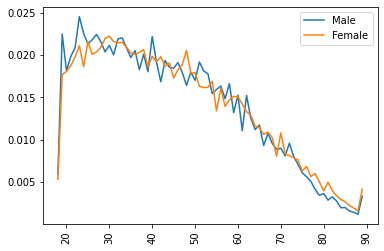

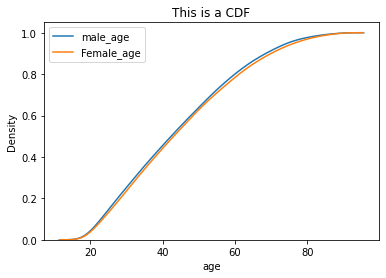

In [34]:
male = gss['sex'] ==1



import seaborn as sns
import numpy as np

# https://seaborn.pydata.org/generated/seaborn.lineplot.html
male_age = gss['age'][male].dropna().sort_values().value_counts(normalize=True)    
sns.lineplot(x=male_age.index, y=male_age.values, label='Male')
female_age = gss['age'][~male].dropna().sort_values().value_counts(normalize=True)
sns.lineplot(x=female_age.index, y=female_age.values, label='Female')

plt.legend()
plt.xticks(rotation=90)

plt.show()




sns.kdeplot(data = gss['age'][male].dropna().sort_values(), cumulative = True, label = "male_age")
sns.kdeplot(data = gss['age'][~male].dropna().sort_values(), cumulative = True, label = "Female_age")

plt.title('This is a CDF')

plt.legend()

plt.show()

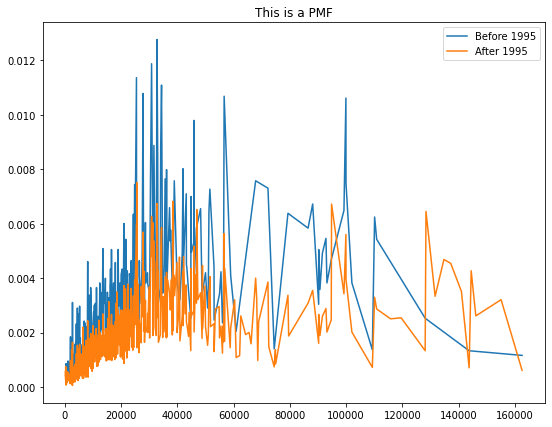

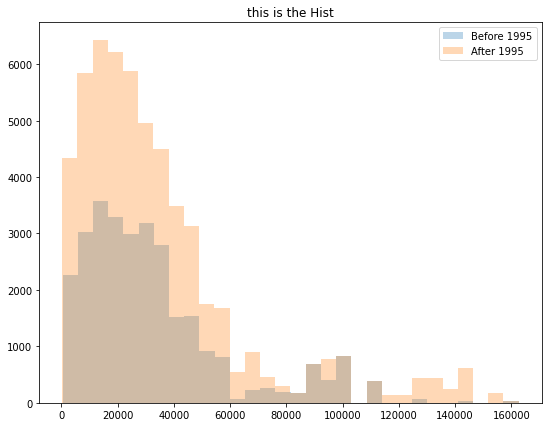

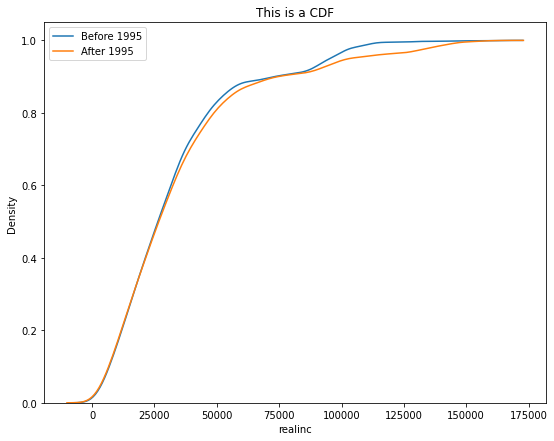

In [40]:
gss['realinc'][gss['year']<1995]

fig, ax = plt.subplots(figsize=(9,7))

before_1995 = gss['realinc'][gss['year']<1995].dropna().value_counts(normalize=True)    
sns.lineplot(x=before_1995.index, y=before_1995.values, label='Before 1995')
after_1995 = gss['realinc'][~gss['year']<1995].dropna().value_counts(normalize=True)
sns.lineplot(x=after_1995.index, y=after_1995.values, label='After 1995')

plt.title('This is a PMF')

plt.show()



fig, ax = plt.subplots(figsize=(9,7))

plt.hist(gss['realinc'][gss['year']<1995].dropna(), bins=30, alpha=0.3, label='Before 1995') 
plt.hist(gss['realinc'][~gss['year']<1995].dropna(), bins=30, alpha=0.3, label='After 1995') 
plt.title('this is the Hist')

plt.legend()                                            # but you need to guess relative bin size, so lets just PMF
plt.show()



fig, ax = plt.subplots(figsize=(9,7))  ### This is universal???  Restudy data visualization courses plt and sns

sns.kdeplot(data = gss['realinc'][gss['year']<1995].dropna().sort_values(), cumulative = True, label = "Before 1995")
sns.kdeplot(data = gss['realinc'][~gss['year']<1995].dropna().sort_values(), cumulative = True, label = "After 1995")

plt.title('This is a CDF')
plt.legend()

plt.show()

## Distribution of education

Let's begin comparing incomes for different levels of education in the GSS dataset, which has been pre-loaded for you into a DataFrame called gss. The variable educ represents the respondent's years of education.

What fraction of respondents report that they have 12 years of education or fewer?
Instructions
50 XP
Possible Answers

    Approximately 22%
    Approximately 31%
    Approximately 47%
    Approximately 53%
    

## Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).
Instructions
100 XP

    Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
    Complete the line that identifies respondents with 12 or fewer years of education.
    Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.


In [ ]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = ____

# High school (12 or fewer years of education)
high = ____
print(high.mean())

## Plot income CDFs

Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:

Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')

You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: high, assc, and bach.
Instructions
100 XP

    Fill in the missing lines of code to plot the CDFs.


In [ ]:
income = gss['realinc']

# Plot the CDFs
____(label='High school')
____(label='Associate')
____(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

## Modeling distributions




In th previous lesson, we used PMFs and CDFs to plot and compare distribution.  [__We saw that PMFs don't work well when the data have a large number of unique values (noices)__].  In this lesson, you'll learn about [][Probability Density Function, or PDFs], and learn how to estimate PDFs from data.  Let start with the normal distribution, also 

